In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import the data
updrs1_df = pd.read_csv('../data/processed/train_updrs_1_cat.csv')
updrs2_df = pd.read_csv('../data/processed/train_updrs_2_cat.csv')
updrs3_df = pd.read_csv('../data/processed/train_updrs_3_cat.csv')

In [3]:
# replace the categorical values with numerical values
updrs1_df['updrs_1_cat'] = updrs1_df['updrs_1_cat'].replace({'mild': 0, 'moderate': 1, 'severe': 1})
updrs2_df['updrs_2_cat'] = updrs2_df['updrs_2_cat'].replace({'mild': 0, 'moderate': 1, 'severe': 1})
updrs3_df['updrs_3_cat'] = updrs3_df['updrs_3_cat'].replace({'mild': 0, 'moderate': 1, 'severe': 1})

updrs1_max = updrs1_df.groupby(['patient_id'])['updrs_1_cat'].max().reset_index()
updrs1_max.columns = ['patient_id', 'updrs_1_max']
updrs2_max = updrs2_df.groupby(['patient_id'])['updrs_2_cat'].max().reset_index()
updrs2_max.columns = ['patient_id', 'updrs_2_max']
updrs3_max = updrs3_df.groupby(['patient_id'])['updrs_3_cat'].max().reset_index()
updrs3_max.columns = ['patient_id', 'updrs_3_max']

In [4]:
max_updrs1_df = pd.merge(updrs1_df, updrs1_max, on='patient_id')
max_updrs2_df = pd.merge(updrs2_df, updrs2_max, on='patient_id')
max_updrs3_df = pd.merge(updrs3_df, updrs3_max, on='patient_id')

In [5]:
# how many patients only have one visit?
updrs1_df.groupby('patient_id')['visit_month'].nunique().value_counts()

3    75
4    67
5    44
6    31
2    12
8     8
7     5
9     5
1     1
Name: visit_month, dtype: int64

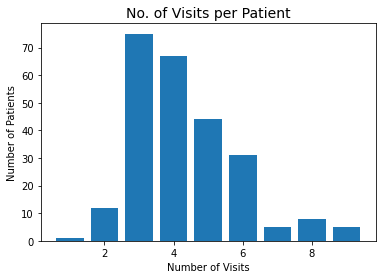

In [14]:
# how many patients only have one visit?
updrs1_df_visit_mo = updrs1_df.groupby('patient_id')['visit_month'].nunique().value_counts()
updrs1_df_visit_mo = updrs1_df_visit_mo.sort_index()

plt.bar(updrs1_df_visit_mo.index, updrs1_df_visit_mo.values)
plt.xlabel('Number of Visits')
plt.ylabel('Number of Patients')
plt.title('No. of Visits per Patient', fontsize=14)
plt.show()

## View the First 12 Months of Visits for Clues

In other notebooks, it was shown that using the visits of months 0 to 12 showed better predictions than looking at all months up to 60

In [255]:
# number of visits in the first 12 months
updrs1_12m_df = max_updrs1_df[max_updrs1_df['visit_month'] <= 12]
updrs2_12m_df = max_updrs2_df[max_updrs2_df['visit_month'] <= 12]
updrs3_12m_df = max_updrs3_df[max_updrs3_df['visit_month'] <= 12]


In [256]:
def get_num_visits(df):
    num_visits = df.groupby('patient_id')['visit_month'].nunique().reset_index()
    num_visits.rename(columns={'visit_month': 'num_visits'}, inplace=True)
    df = pd.merge(df, num_visits, on='patient_id')
    
    return df

### Is there a pattern of more visits for more severe final results?

In [257]:
max_updrs1_df = pd.merge(updrs1_df, updrs1_max, on='patient_id')
max_updrs2_df = pd.merge(updrs2_df, updrs2_max, on='patient_id')
max_updrs3_df = pd.merge(updrs3_df, updrs3_max, on='patient_id')

In [258]:
max_updrs1_df = get_num_visits(max_updrs1_df)
max_updrs2_df = get_num_visits(max_updrs2_df)
max_updrs3_df = get_num_visits(max_updrs3_df)

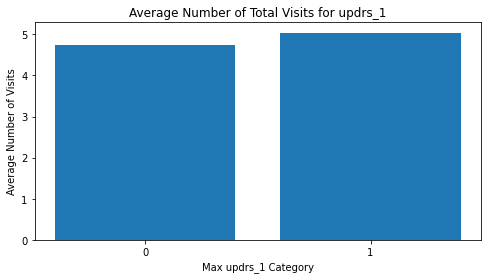

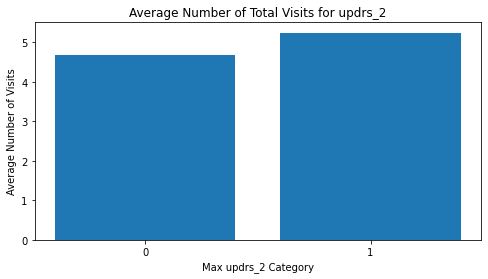

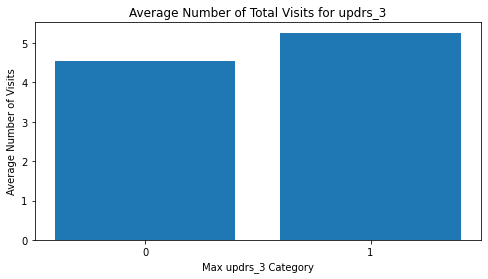

In [259]:
# plot the average number of visits for each category
for updrs, df in zip(['updrs_1', 'updrs_2', 'updrs_3'], [max_updrs1_df, max_updrs2_df, max_updrs3_df]):
    plt.figure(figsize=(8, 4))
    plt.bar(df.groupby(f'{updrs}_cat')['num_visits'].mean().index.astype(str), df.groupby(f'{updrs}_max')['num_visits'].mean())
    plt.title(f'Average Number of Total Visits for {updrs}')
    plt.xlabel(f'Max {updrs} Category')
    plt.ylabel('Average Number of Visits')
    plt.show()


#### There is a pattern that a patient will tend to have more visits if their final severity is not mild 

In [260]:
updrs1_12m_df = get_num_visits(updrs1_12m_df)
updrs2_12m_df = get_num_visits(updrs2_12m_df)
updrs3_12m_df = get_num_visits(updrs3_12m_df)

In [261]:
updrs1_12m_df.head()

,visit_id,patient_id,visit_month,updrs_1,O00391,O00533,O00584,O14498,O14773,O14791,...,YYC(UniMod_4)FQGNQFLR_P02790,YYTYLIMNK_P01024,YYWGGQYTWDMAK_P02675,kfold,num_prot_pep,num_prot,num_pept,updrs_1_cat,updrs_1_max,num_visits
0,15009_6,15009,6,10.0,8405.07,534045.0,30143.1,20820.7,11807.80,0.000,...,471637.0,34750.8,13215.8,0,1.105130e+09,5.525650e+08,5.525647e+08,0,0,3
1,15009_0,15009,0,8.0,10507.70,642774.0,33806.6,24485.6,19584.20,942.321,...,538519.0,44582.6,10911.2,1,1.237699e+09,6.188492e+08,6.188494e+08,0,0,3
2,15009_12,15009,12,4.0,11688.00,728830.0,34592.1,29292.5,17499.30,0.000,...,497922.0,51984.8,18033.5,2,1.175730e+09,5.878655e+08,5.878650e+08,0,0,3
3,34182_0,34182,0,5.0,13144.20,503759.0,20753.7,25581.6,9324.97,4274.350,...,336030.0,31839.1,18771.8,0,1.011517e+09,5.057586e+08,5.057581e+08,0,1,2
4,34182_12,34182,12,4.0,9414.49,431758.0,15056.9,18688.3,11891.70,3161.310,...,348914.0,33597.4,19450.7,4,9.833463e+08,4.916734e+08,4.916729e+08,0,1,2


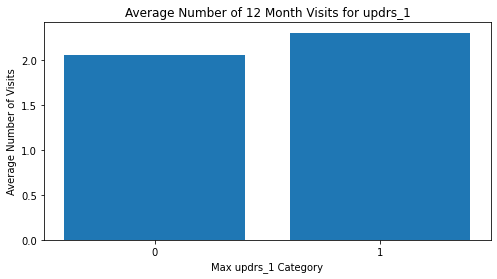

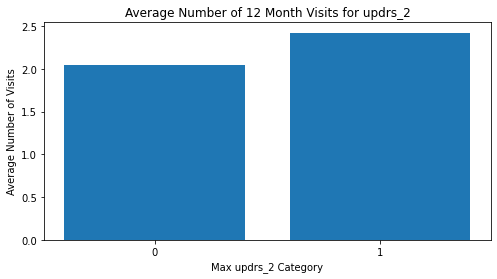

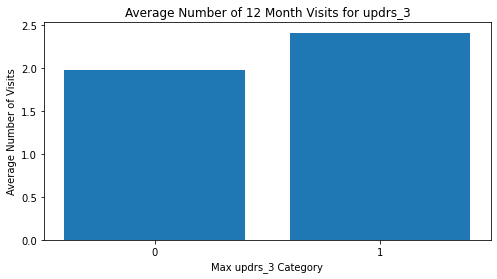

In [262]:
# plot the average number of visits for each category
for updrs, df in zip(['updrs_1', 'updrs_2', 'updrs_3'], [updrs1_12m_df, updrs2_12m_df, updrs3_12m_df]):
    plt.figure(figsize=(8, 4))
    plt.bar(df.groupby(f'{updrs}_cat')['num_visits'].mean().index.astype(str), df.groupby(f'{updrs}_max')['num_visits'].mean())
    plt.title(f'Average Number of 12 Month Visits for {updrs}')
    plt.xlabel(f'Max {updrs} Category')
    plt.ylabel('Average Number of Visits')
    plt.show()

## Look at the Supplemental Clinical Data

In [263]:
# read the supplemental data
supp_df = pd.read_csv('../data/raw/supplemental_clinical_data.csv')

In [264]:
train_clin_df = pd.read_csv('../data/raw/train_clinical_data.csv')

In [265]:
supp_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [266]:
train_clin_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


## What percentage of the supplemental patients are in the train clinical?

In [267]:
supp_pat_list = supp_df['patient_id'].unique()

train_clin_df['patient_id'].isin(supp_pat_list).sum()

0

 None!

 ## Do the supplemental have protein data?

In [268]:
# import the train proetin data
train_protein_df = pd.read_csv('../data/raw/train_proteins.csv')

In [269]:
prot_pat_list = train_protein_df['patient_id'].unique()
len([pat for pat in prot_pat_list if pat in supp_pat_list])

0

No they do not!

## Look for the number of proteins per class with non-zero values in the first 12 months

In [270]:
updrs1_12m_df.head()

,visit_id,patient_id,visit_month,updrs_1,O00391,O00533,O00584,O14498,O14773,O14791,...,YYC(UniMod_4)FQGNQFLR_P02790,YYTYLIMNK_P01024,YYWGGQYTWDMAK_P02675,kfold,num_prot_pep,num_prot,num_pept,updrs_1_cat,updrs_1_max,num_visits
0,15009_6,15009,6,10.0,8405.07,534045.0,30143.1,20820.7,11807.80,0.000,...,471637.0,34750.8,13215.8,0,1.105130e+09,5.525650e+08,5.525647e+08,0,0,3
1,15009_0,15009,0,8.0,10507.70,642774.0,33806.6,24485.6,19584.20,942.321,...,538519.0,44582.6,10911.2,1,1.237699e+09,6.188492e+08,6.188494e+08,0,0,3
2,15009_12,15009,12,4.0,11688.00,728830.0,34592.1,29292.5,17499.30,0.000,...,497922.0,51984.8,18033.5,2,1.175730e+09,5.878655e+08,5.878650e+08,0,0,3
3,34182_0,34182,0,5.0,13144.20,503759.0,20753.7,25581.6,9324.97,4274.350,...,336030.0,31839.1,18771.8,0,1.011517e+09,5.057586e+08,5.057581e+08,0,1,2
4,34182_12,34182,12,4.0,9414.49,431758.0,15056.9,18688.3,11891.70,3161.310,...,348914.0,33597.4,19450.7,4,9.833463e+08,4.916734e+08,4.916729e+08,0,1,2


In [271]:
info_cols = ['visit_id',
             'patient_id',
             'visit_month',
             'updrs_1_cat', 
             'updrs_2_cat', 
             'updrs_3_cat', 
             'num_visits', 
             'updrs_1', 
             'updrs_2', 
             'updrs_3',
             'kfold',
             'num_prot_pep',
             'num_prot', 
             'num_pept']

In [272]:
prot_cols = [col for col in updrs1_df.columns if col not in info_cols]
prot_12m_updrs1_df = updrs1_12m_df[prot_cols]
prot_12m_updrs2_df = updrs2_12m_df[prot_cols]
prot_12m_updrs3_df = updrs3_12m_df[prot_cols]

In [273]:
# count how many proteins are greater than 0 for each patient
prot_12m_updrs1_df['num_prot_gt_0'] = prot_12m_updrs1_df[prot_cols].gt(0).sum(axis=1)
prot_12m_updrs2_df['num_prot_gt_0'] = prot_12m_updrs2_df[prot_cols].gt(0).sum(axis=1)
prot_12m_updrs3_df['num_prot_gt_0'] = prot_12m_updrs3_df[prot_cols].gt(0).sum(axis=1)


c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [274]:
# put the data back into the updrs dataframes
updrs1_12m_df['num_prot_gt_0'] = prot_12m_updrs1_df['num_prot_gt_0']
updrs2_12m_df['num_prot_gt_0'] = prot_12m_updrs2_df['num_prot_gt_0']
updrs3_12m_df['num_prot_gt_0'] = prot_12m_updrs3_df['num_prot_gt_0']

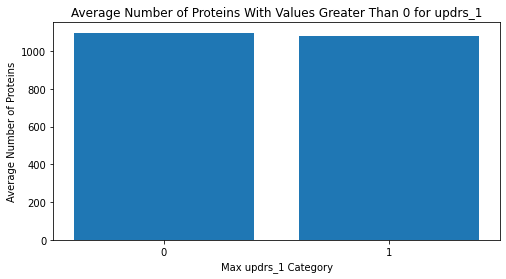

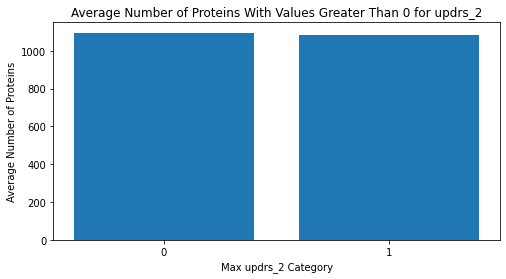

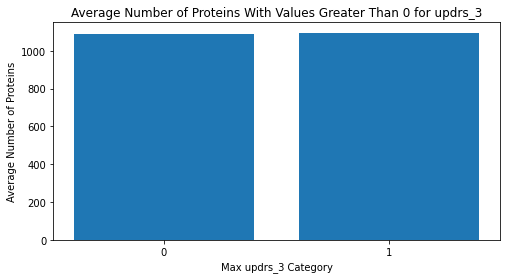

In [275]:
# plot the number of proteins greater than 0 for each category
for updrs, df in zip(['updrs_1', 'updrs_2', 'updrs_3'], [updrs1_12m_df, updrs2_12m_df, updrs3_12m_df]):
    plt.figure(figsize=(8, 4))
    plt.bar(df.groupby(f'{updrs}_max')['num_prot_gt_0'].mean().index.astype(str), df.groupby(f'{updrs}_max')['num_prot_gt_0'].mean())
    plt.title(f'Average Number of Proteins With Values Greater Than 0 for {updrs}')
    plt.xlabel(f'Max {updrs} Category')
    plt.ylabel('Average Number of Proteins')
    plt.show()

#### Not much of a difference

## Look at the Number of Proteins Greater than 0 for All Visits

In [276]:
prot_updrs1_df = max_updrs1_df[prot_cols]
prot_updrs2_df = max_updrs2_df[prot_cols]
prot_updrs3_df = max_updrs3_df[prot_cols]

In [277]:
prot_updrs1_df['num_prot_gt_0'] = prot_updrs1_df[prot_cols].gt(0).sum(axis=1)
prot_updrs2_df['num_prot_gt_0'] = prot_updrs2_df[prot_cols].gt(0).sum(axis=1)
prot_updrs3_df['num_prot_gt_0'] = prot_updrs3_df[prot_cols].gt(0).sum(axis=1)

c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [278]:
# put the data back into the updrs dataframes
max_updrs1_df['num_prot_gt_0'] = prot_updrs1_df['num_prot_gt_0']
max_updrs2_df['num_prot_gt_0'] = prot_updrs2_df['num_prot_gt_0']
max_updrs3_df['num_prot_gt_0'] = prot_updrs3_df['num_prot_gt_0']

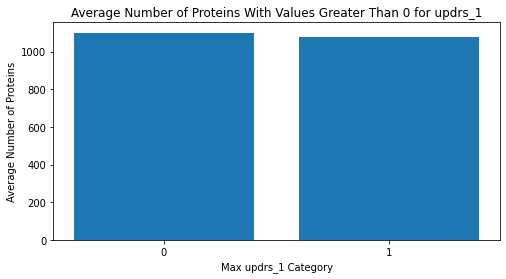

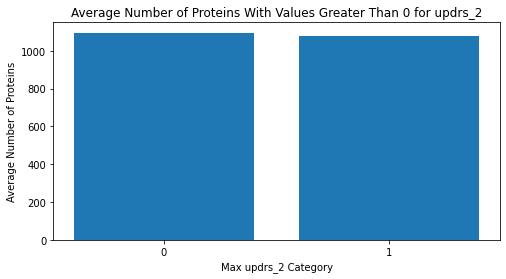

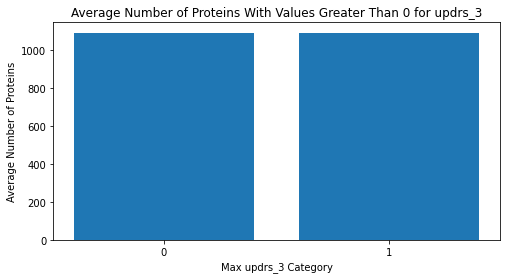

In [279]:
# plot the number of proteins greater than 0 for each category
for updrs, df in zip(['updrs_1', 'updrs_2', 'updrs_3'], [max_updrs1_df, max_updrs2_df, max_updrs3_df]):
    plt.figure(figsize=(8, 4))
    plt.bar(df.groupby(f'{updrs}_max')['num_prot_gt_0'].mean().index.astype(str), df.groupby(f'{updrs}_max')['num_prot_gt_0'].mean())
    plt.title(f'Average Number of Proteins With Values Greater Than 0 for {updrs}')
    plt.xlabel(f'Max {updrs} Category')
    plt.ylabel('Average Number of Proteins')
    plt.show()

## What percentage of users have a visit_month  of 12

In [280]:
updrs1_df[updrs1_df['visit_month'] == 12].shape[0] / updrs1_df['patient_id'].nunique()

0.7258064516129032

In [281]:
# do the rest have a 18 month visit or 10 month visit
twelve_month_patients = updrs1_df[updrs1_df['visit_month'] == 12]['patient_id'].unique()

non_twelve_month_df = updrs1_df[~updrs1_df['patient_id'].isin(twelve_month_patients)]

non_twelve_month_df['visit_month'].value_counts()

0      60
24     44
36     41
48     31
6      22
60     19
84      7
72      4
18      4
108     1
96      1
Name: visit_month, dtype: int64

It looks like most have a 24 month visit that could be used

In [282]:
updrs1_df['visit_month'].value_counts()

0      194
12     180
24     173
36     147
48     137
6       85
60      84
84      30
72      21
18       8
108      3
96       2
54       2
30       1
3        1
Name: visit_month, dtype: int64

In [283]:
# get the difference of the proteins values from visit_month 0 to visit_month 12 and to visit_month 24
updrs1_patient_visit_0 = updrs1_df[updrs1_df['visit_month'] == 0]
updrs1_patient_visit_6 = updrs1_df[updrs1_df['visit_month'] == 6]
updrs1_patient_visit_12 = updrs1_df[updrs1_df['visit_month'] == 12]
updrs1_patient_visit_18 = updrs1_df[updrs1_df['visit_month'] == 18]
updrs1_patient_visit_24 = updrs1_df[updrs1_df['visit_month'] == 24]



In [284]:
# create patient lists for the visit months of 24 months or less
visit0_pat = updrs1_patient_visit_0['patient_id'].unique()
visit12_pat = updrs1_patient_visit_12['patient_id'].unique()
visit6_pat = updrs1_patient_visit_6['patient_id'].unique()
visit18_pat = updrs1_patient_visit_18['patient_id'].unique()
visit24_pat = updrs1_patient_visit_24['patient_id'].unique()



In [285]:
patient_updrs1_diff = dict()

for pat_id in visit0_pat:
    if pat_id in visit12_pat:
        pat_visit0_df = updrs1_patient_visit_0[updrs1_patient_visit_0['patient_id'] == pat_id]
        pat_visit12_df = updrs1_patient_visit_12[updrs1_patient_visit_12['patient_id'] == pat_id]
        
        pat_visit0_prots = pat_visit0_df[prot_cols]
        pat_visit0_prots.index = ['protein_vals']
        pat_visit12_prots = pat_visit12_df[prot_cols]
        pat_visit12_prots.index = ['protein_vals']
        
        pat_12m_diff = pat_visit12_prots.T - pat_visit0_prots.T
        pat_12m_diff.columns = ['12m_diff']
        #pat_12m_diff['12m_pct_diff'] = pat_12m_diff / pat_visit12_prots.T
        final_df = pat_12m_diff
        
    if pat_id in visit18_pat:
        pat_visit18_df = updrs1_patient_visit_18[updrs1_patient_visit_18['patient_id'] == pat_id]
        
        pat_visit0_prots = pat_visit0_df[prot_cols]
        pat_visit0_prots.index = ['protein_vals']
        pat_visit18_prots = pat_visit18_df[prot_cols]
        pat_visit18_prots.index = ['protein_vals']
        
        pat_18m_diff = pat_visit18_prots.T - pat_visit0_prots.T
        pat_18m_diff.columns = ['18m_diff']
        #pat_18m_diff['18m_pct_diff'] = pat_18m_diff / pat_visit18_prots.T
        
        if pat_id in visit12_pat:
            # combine the 12m and 18m dataframes
            final_df = pd.merge(final_df, pat_18m_diff, left_index=True, right_index=True)
            
        else:
            final_df = pat_18m_diff
            
    if pat_id in visit24_pat:
        pat_visit24_df = updrs1_patient_visit_24[updrs1_patient_visit_24['patient_id'] == pat_id]
        
        pat_visit0_prots = pat_visit0_df[prot_cols]
        pat_visit0_prots.index = ['protein_vals']
        pat_visit24_prots = pat_visit24_df[prot_cols]
        pat_visit24_prots.index = ['protein_vals']
        
        pat_24m_diff = pat_visit24_prots.T - pat_visit0_prots.T
        pat_24m_diff.columns = ['24m_diff']
        #pat_24m_diff['24m_pct_diff'] = pat_24m_diff / pat_visit24_prots.T
        
        if pat_id in visit12_pat or pat_id in visit18_pat:
            # combine the final_df with the 24m_diff dataframe
            final_df = pd.merge(final_df, pat_24m_diff, left_index=True, right_index=True)
            
        else:
            final_df = pat_24m_diff
    try:
        patient_updrs1_diff[pat_id] = final_df
    except:
        continue        

In [286]:
def max_min_diff(updrs_dict, pat_id):
    temp_df = updrs_dict[pat_id]
    
    temp_df['24m_max_diff'] = temp_df.max(axis=1)
    temp_df['24m_min_diff'] = temp_df.min(axis=1)
    temp_df = temp_df[['24m_max_diff', '24m_min_diff']]
    temp_df['patient_id'] = pat_id
    diff_df = pd.DataFrame(index=[pat_id])
    for i in temp_df.index:
        diff_df[i+'_24m_max_diff'] = temp_df.loc[i, '24m_max_diff']
        diff_df[i+'_24m_min_diff'] = temp_df.loc[i, '24m_min_diff']
    
    return diff_df


In [287]:
patient_updrs1_diff.keys()

dict_keys([7832, 40874, 23636, 30119, 29417, 53103, 13618, 59574, 34182, 22623, 17414, 21126, 50611, 56119, 5742, 57416, 27715, 8699, 14242, 47103, 26210, 12703, 48780, 38419, 26005, 55302, 15504, 28342, 6054, 47513, 58270, 6211, 60170, 41871, 51243, 62329, 33548, 49995, 40967, 57478, 25911, 40022, 20791, 57646, 14035, 19088, 40751, 14811, 40340, 30894, 7117, 25739, 28818, 63875, 61974, 12755, 45161, 35696, 44682, 62723, 35675, 23244, 2660, 14450, 1517, 4161, 63889, 37312, 42003, 23391, 25562, 33558, 15009, 41628, 42385, 58823, 36797, 5027, 60326, 10541, 20216, 18560, 10174, 27971, 46837, 12636, 31154, 5178, 24278, 13968, 64674, 58189, 27464, 17727, 12516, 20404, 55662, 62437, 16566, 49683, 18204, 10718, 35477, 20352, 56075, 41883, 56073, 21729, 40200, 55256, 51893, 16238, 26104, 56727, 29313, 30416, 24690, 3636, 41617, 62792, 22126, 13368, 23192, 45181, 27079, 21537, 16574, 27300, 11686, 25750, 10715, 24911, 4172, 30951, 7051, 60443, 24820, 47881, 57321, 58653, 30155, 44154, 35231, 20

In [300]:
final_max_min_df = pd.DataFrame()

for pat_id in patient_updrs1_diff.keys():
    max_min_df = max_min_diff(patient_updrs1_diff, pat_id)
    final_max_min_df = pd.concat([final_max_min_df, max_min_df])
    


c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Dagart\anaconda3\envs\easypy37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [301]:
final_max_min_df = final_max_min_df.reset_index()
final_max_min_df = final_max_min_df.rename(columns={'index': 'patient_id'})

In [302]:
updrs1_num_max = max_updrs1_df.groupby('patient_id')[['num_prot_gt_0', 'updrs_1_max']].mean()
final_max_min_df = pd.merge(final_max_min_df, updrs1_num_max, on='patient_id')
updrs2_num_max = max_updrs2_df.groupby('patient_id')[[ 'updrs_2_max']].mean()
final_max_min_df = pd.merge(final_max_min_df, updrs2_num_max, on='patient_id')
updrs3_num_max = max_updrs3_df.groupby('patient_id')[['updrs_3_max']].mean()
final_max_min_df = pd.merge(final_max_min_df, updrs3_num_max, on='patient_id')



In [303]:
final_max_min_df

,patient_id,O00391_24m_max_diff,O00391_24m_min_diff,O00533_24m_max_diff,O00533_24m_min_diff,O00584_24m_max_diff,O00584_24m_min_diff,O14498_24m_max_diff,O14498_24m_min_diff,O14773_24m_max_diff,...,YYC(UniMod_4)FQGNQFLR_P02790_24m_max_diff,YYC(UniMod_4)FQGNQFLR_P02790_24m_min_diff,YYTYLIMNK_P01024_24m_max_diff,YYTYLIMNK_P01024_24m_min_diff,YYWGGQYTWDMAK_P02675_24m_max_diff,YYWGGQYTWDMAK_P02675_24m_min_diff,num_prot_gt_0,updrs_1_max,updrs_2_max,updrs_3_max
0,7832,0.00,0.00,13937.0,13937.0,15188.8,15188.8,10337.2,10337.2,11159.76,...,-52854.0,-52854.0,12250.0,12250.0,41160.90,41160.90,1117.200000,0.0,0.0,1.0
1,40874,138.90,138.90,-24110.0,-24110.0,-5059.1,-5059.1,-1893.1,-1893.1,-8046.59,...,234.0,234.0,7739.9,7739.9,2436.10,2436.10,1121.250000,0.0,0.0,1.0
2,23636,-9656.96,-9656.96,-138626.0,-138626.0,2473.7,2473.7,653.6,653.6,10038.74,...,-55134.0,-55134.0,-21346.9,-21346.9,2725.76,2725.76,1114.000000,1.0,0.0,0.0
3,30119,0.00,0.00,182841.0,112577.0,9552.7,-1674.2,15416.4,12478.9,10746.38,...,137550.0,23517.0,11404.2,5418.4,50618.60,35289.40,1006.666667,1.0,1.0,1.0
4,29417,0.00,0.00,154844.0,117353.0,4852.1,-10615.7,7993.2,6153.3,12549.30,...,-213547.0,-275620.0,34506.0,0.0,0.00,0.00,920.800000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,28327,946.40,-351.30,67263.0,-18605.0,12000.9,11800.2,512.7,-2831.4,329.30,...,272500.0,60711.0,34882.3,10797.4,32644.00,0.00,1132.285714,0.0,0.0,1.0
190,60803,6555.37,6472.71,-92037.0,-140597.0,-1523.7,-5231.6,-3250.2,-7526.7,-5266.60,...,-112585.0,-192105.0,46849.2,40049.5,10756.60,1971.30,1105.714286,0.0,1.0,1.0
191,7568,-5721.80,-5721.80,4165.0,4165.0,-6363.7,-6363.7,-31180.3,-31180.3,1523.70,...,-60786.0,-60786.0,5248.2,5248.2,-9180.34,-9180.34,1139.750000,0.0,0.0,0.0
192,11459,-13541.60,-13541.60,-118495.0,-296644.0,-27429.9,-27429.9,926.4,362.2,-4172.20,...,-406858.0,-434398.0,-66307.7,-66307.7,-15040.40,-18445.50,919.600000,1.0,1.0,1.0


## Take the raw values of the first 24 months and get the max and min value for each protein

In [306]:
first_24_df = updrs1_df[updrs1_df['visit_month'] <= 24]
first_24_df_max = first_24_df.groupby('patient_id')[prot_cols].max().reset_index()
first_24_df_max.columns = ['patient_id'] + [col + '_max' for col in prot_cols]
first_24_df_min = first_24_df.groupby('patient_id')[prot_cols].min().reset_index()
first_24_df_min.columns = ['patient_id'] + [col + '_min' for col in prot_cols]

In [309]:
first_24_raw_df = first_24_df_min.merge(first_24_df_max, on='patient_id')

In [311]:
final_prot_df = final_max_min_df.merge(first_24_raw_df, on='patient_id')
final_prot_df.head()

,patient_id,O00391_24m_max_diff,O00391_24m_min_diff,O00533_24m_max_diff,O00533_24m_min_diff,O00584_24m_max_diff,O00584_24m_min_diff,O14498_24m_max_diff,O14498_24m_min_diff,O14773_24m_max_diff,...,YSLTYIYTGLSK_P25311_max,YTTEIIK_P00736_max,YVGGQEHFAHLLILR_P02763_max,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR_P00738_max,YVMLPVADQDQC(UniMod_4)IR_P00738_max,YVNKEIQNAVNGVK_P10909_max,YWGVASFLQK_P02753_max,YYC(UniMod_4)FQGNQFLR_P02790_max,YYTYLIMNK_P01024_max,YYWGGQYTWDMAK_P02675_max
0,7832,0.00,0.00,13937.0,13937.0,15188.8,15188.8,10337.2,10337.2,11159.76,...,264123.0,10135.8,4308190.0,287228.0,1188190.0,105262.0,119051.0,530247.0,59186.5,41160.9
1,40874,138.90,138.90,-24110.0,-24110.0,-5059.1,-5059.1,-1893.1,-1893.1,-8046.59,...,225145.0,14107.7,5319090.0,5555.8,1764240.0,89180.0,160973.0,395954.0,52582.4,20639.5
2,23636,-9656.96,-9656.96,-138626.0,-138626.0,2473.7,2473.7,653.6,653.6,10038.74,...,195196.0,12993.9,5184580.0,89648.1,883685.0,62224.2,170098.0,647961.0,64110.0,12694.0
3,30119,0.00,0.00,182841.0,112577.0,9552.7,-1674.2,15416.4,12478.9,10746.38,...,185536.0,6870.4,4749580.0,166512.0,921488.0,52793.0,118695.0,501415.0,40288.8,50618.6
4,29417,0.00,0.00,154844.0,117353.0,4852.1,-10615.7,7993.2,6153.3,12549.30,...,195454.0,0.0,0.0,235477.0,428694.0,94570.5,106663.0,624249.0,34506.0,0.0


In [313]:
# store the data as a csv
final_prot_df.to_csv('../data/processed/train_24month_protein_data.csv', index=False)